# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\goshl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")
api_key

'091e911b73c946c58e5c28bd08a17f8b'

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
Bitcoin_Evrything = newsapi.get_everything(q="Bitcoin", language="en", sort_by='relevancy' , page=2)
Bitcoin_article = Bitcoin_Evrything['articles']
Bitcoin_article_content = Bitcoin_Evrything['articles'][0]['content']
Bitcoin_article


[{'source': {'id': 'reuters', 'name': 'Reuters'},
  'author': 'Reuters Staff',
  'title': "Tesla stops taking bitcoin, cites fossil fuel use in 'mining' cybercurrency - Reuters",
  'description': 'Tesla Inc has suspended the use of bitcoin to purchase vehicles, Chief Executive Officer Elon Musk said in a tweet, citing concerns about use of fossil fuel for bitcoin mining. (Reporting by Ankur Banerjee in Bengaluru)',
  'url': 'https://www.reuters.com/article/tesla-bitcoin-musk-idUSL4N2MZ4YX',
  'urlToImage': 'https://s1.reutersmedia.net/resources_v2/images/rcom-default.png?w=800',
  'publishedAt': '2021-05-12T22:18:00Z',
  'content': 'By Reuters Staff\r\nMay 12 (Reuters) - Tesla Inc has suspended the use of bitcoin to purchase vehicles, Chief Executive Officer Elon Musk said in a tweet, citing concerns about use of fossil fuel for b… [+56 chars]'},
 {'source': {'id': None, 'name': 'Gizmodo.com'},
  'author': 'Whitney Kimball',
  'title': "Coinbase Says Screw It, We'll Let You Buy Doge",


In [5]:
# Fetch the Ethereum news articles
Ethereum_Evrything = newsapi.get_everything(q="Ethereum", language="en", sort_by='relevancy' , page=2)
Ethereum_article = Ethereum_Evrything['articles']
Ethereum_article_content= Ethereum_Evrything['articles'][0]['content']
Ethereum_article


[{'source': {'id': None, 'name': 'Entrepreneur'},
  'author': 'James Murphy',
  'title': 'The Biggest Problems Challenging DeFi, and How To Solve Them',
  'description': 'For DeFi to go mainstream, it needs to look outside of Ethereum for scalability & low fees.',
  'url': 'https://www.entrepreneur.com/article/368299',
  'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1618495757-GettyImages-1306843591.jpg',
  'publishedAt': '2021-04-27T12:00:00Z',
  'content': 'April\r\n27, 2021\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nThe prevalent economic narrative of this year has revolved around one concept: inflation. Year after year,… [+6638 chars]'},
 {'source': {'id': None, 'name': 'Entrepreneur'},
  'author': 'Entrepreneur en Español',
  'title': "Ethereum Co-Founder Predicts Dogecoin 'Bubble' Will Burst Anytime, Blames Elon Musk",
  'description': "Ethereum co-founder Charles Hoskinson says Dogecoin is a worthless 'bubble' fueled by E

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiment = []

for article in Bitcoin_Evrything["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiment.append({"text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
        
    except AttributeError:
        pass
    

Bitcoin_df = pd.DataFrame(Bitcoin_sentiment)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()




,date,text,compound,positive,negative,neutral
0,2021-05-12,By Reuters Staff\r\nMay 12 (Reuters) - Tesla I...,-0.4767,0.000,0.081,0.919
1,2021-05-14,The cryptocurrency exchange platform Coinbase ...,0.0000,0.000,0.000,1.000
2,2021-04-24,"Jack Dorsey, the co-founder and CEO of Twitter...",0.0000,0.000,0.000,1.000
3,2021-04-22,"Coinswitch Kuber, a startup that allows young ...",0.3400,0.091,0.000,0.909
4,2021-05-13,Tesla CEO Elon Musk says the company has suspe...,-0.4767,0.000,0.088,0.912


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiment = []

for article in Ethereum_Evrything['articles']:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiment.append({"text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
        
    except AttributeError:
        pass
    

Ethereum_df = pd.DataFrame(Ethereum_sentiment)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()




,date,text,compound,positive,negative,neutral
0,2021-04-27,"April\r\n27, 2021\r\n6 min read\r\nOpinions ex...",0.0000,0.000,0.000,1.000
1,2021-04-23,"April\r\n23, 2021\r\n3 min read\r\nThis articl...",-0.3400,0.000,0.072,0.928
2,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.000,1.000
3,2021-05-07,Coinbase shares tumbled today to their their l...,0.4404,0.122,0.047,0.831
4,2021-05-09,Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r...,0.6423,0.149,0.000,0.851


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()




,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.129330,0.029300,0.051250,0.919500
std,0.345353,0.046363,0.055134,0.070196
min,-0.726900,0.000000,0.000000,0.776000
25%,-0.405525,0.000000,0.000000,0.870500
50%,0.000000,0.000000,0.050500,0.915500
75%,0.000000,0.064000,0.082500,1.000000
max,0.659700,0.167000,0.172000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.169175,0.056900,0.018400,0.924700
std,0.296518,0.050253,0.033859,0.057154
min,-0.421500,0.000000,0.000000,0.831000
25%,0.000000,0.000000,0.000000,0.892250
50%,0.128000,0.068000,0.000000,0.928000
75%,0.365100,0.083250,0.011750,0.965500
max,0.642300,0.149000,0.094000,1.000000


### Questions:

Q: Ethereum has the highest mean positive score?

A: 

Q: Ethereum had the highest compound score?

A: 

Q. Bitcoin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\goshl\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goshl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goshl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goshl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
print(stopwords.words('english'))
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokens_bit(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', Bitcoin_article_content) # I only used one content for demonstration purpose
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    
    
    return tokens
def tokens_eth(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', Ethereum_article_content) # # I only used one content for demonstration purpose
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
new_tokens_bit = tokens_bit(Bitcoin_article_content)
new_tokens_bit

['reuters',
 'staffmay',
 'reuters',
 'tesla',
 'inc',
 'ha',
 'suspended',
 'use',
 'bitcoin',
 'purchase',
 'vehicle',
 'chief',
 'executive',
 'officer',
 'elon',
 'musk',
 'said',
 'tweet',
 'citing',
 'concern',
 'use',
 'fossil',
 'fuel',
 'b',
 'char']

In [14]:
# Create a new tokens column for Ethereum

new_tokens_eth = tokens_eth(Ethereum_article_content)
new_tokens_eth

['april',
 'min',
 'readopinions',
 'expressed',
 'entrepreneur',
 'contributor',
 'ownthe',
 'prevalent',
 'economic',
 'narrative',
 'year',
 'ha',
 'revolved',
 'around',
 'one',
 'concept',
 'inflation',
 'year',
 'year',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords, reuters

In [16]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(new_tokens_bit, n=2))
print(dict(bigram_counts))

{('reuters', 'staffmay'): 1, ('staffmay', 'reuters'): 1, ('reuters', 'tesla'): 1, ('tesla', 'inc'): 1, ('inc', 'ha'): 1, ('ha', 'suspended'): 1, ('suspended', 'use'): 1, ('use', 'bitcoin'): 1, ('bitcoin', 'purchase'): 1, ('purchase', 'vehicle'): 1, ('vehicle', 'chief'): 1, ('chief', 'executive'): 1, ('executive', 'officer'): 1, ('officer', 'elon'): 1, ('elon', 'musk'): 1, ('musk', 'said'): 1, ('said', 'tweet'): 1, ('tweet', 'citing'): 1, ('citing', 'concern'): 1, ('concern', 'use'): 1, ('use', 'fossil'): 1, ('fossil', 'fuel'): 1, ('fuel', 'b'): 1, ('b', 'char'): 1}


In [17]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(new_tokens_eth, n=2))
print(dict(bigram_counts))

{('april', 'min'): 1, ('min', 'readopinions'): 1, ('readopinions', 'expressed'): 1, ('expressed', 'entrepreneur'): 1, ('entrepreneur', 'contributor'): 1, ('contributor', 'ownthe'): 1, ('ownthe', 'prevalent'): 1, ('prevalent', 'economic'): 1, ('economic', 'narrative'): 1, ('narrative', 'year'): 1, ('year', 'ha'): 1, ('ha', 'revolved'): 1, ('revolved', 'around'): 1, ('around', 'one'): 1, ('one', 'concept'): 1, ('concept', 'inflation'): 1, ('inflation', 'year'): 1, ('year', 'year'): 1, ('year', 'char'): 1}


In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(new_tokens_bit, 10)

[('reuters', 2),
 ('use', 2),
 ('staffmay', 1),
 ('tesla', 1),
 ('inc', 1),
 ('ha', 1),
 ('suspended', 1),
 ('bitcoin', 1),
 ('purchase', 1),
 ('vehicle', 1)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(new_tokens_eth, 10)

[('year', 3),
 ('april', 1),
 ('min', 1),
 ('readopinions', 1),
 ('expressed', 1),
 ('entrepreneur', 1),
 ('contributor', 1),
 ('ownthe', 1),
 ('prevalent', 1),
 ('economic', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [30.0, 15.0]

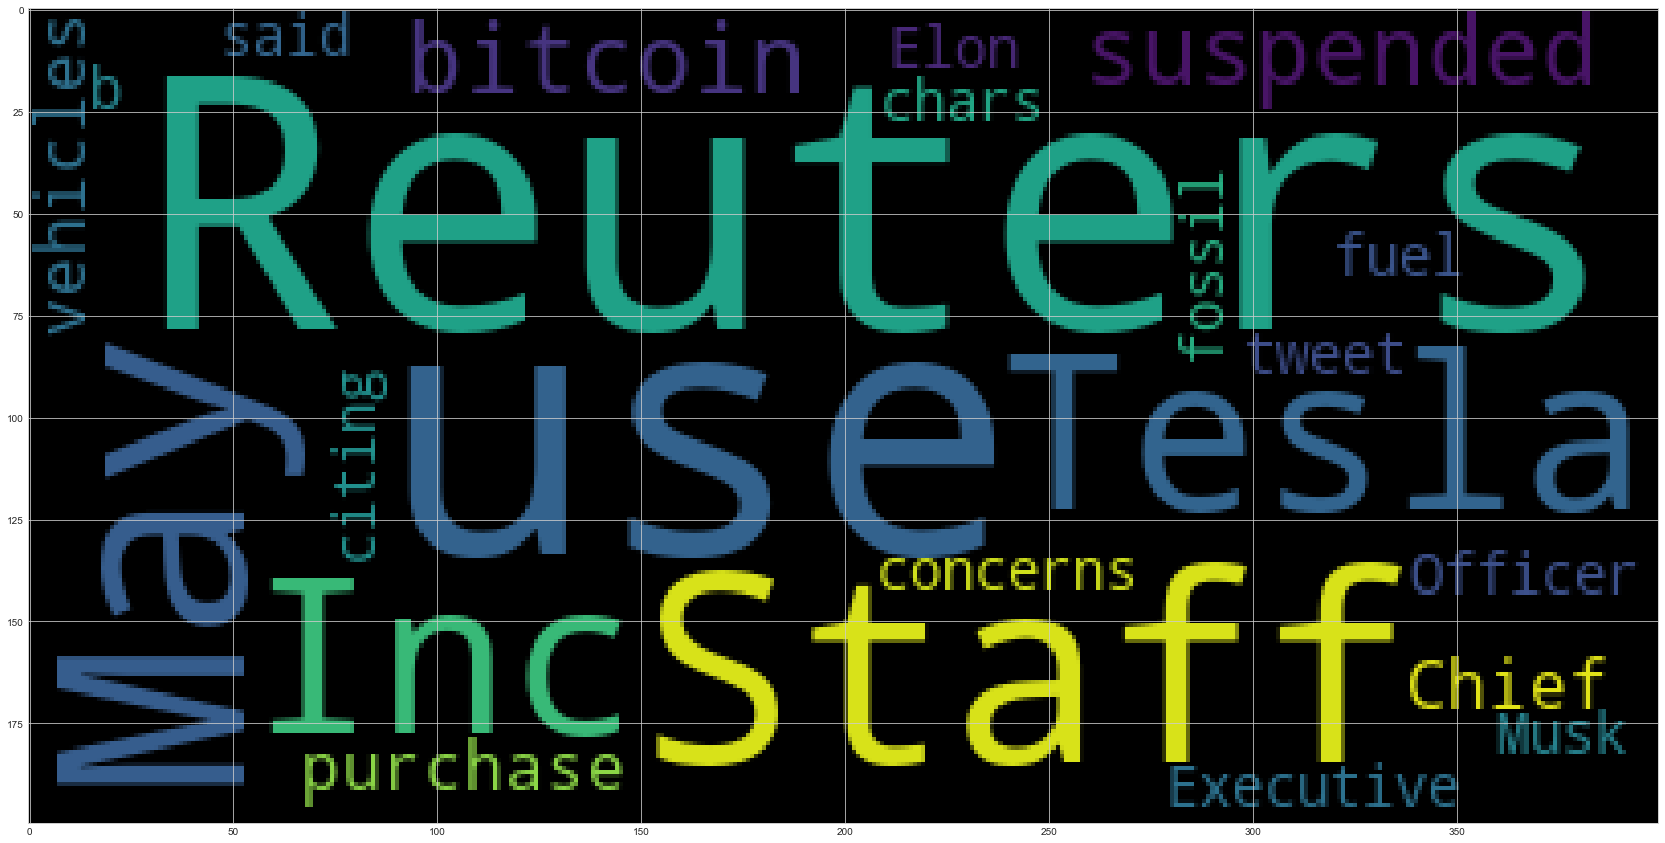

In [22]:
# Generate the Bitcoin word cloud

#input_text = new_tokens_bit(big_string)
wc = WordCloud().generate(Bitcoin_article_content)
plt.imshow(wc)

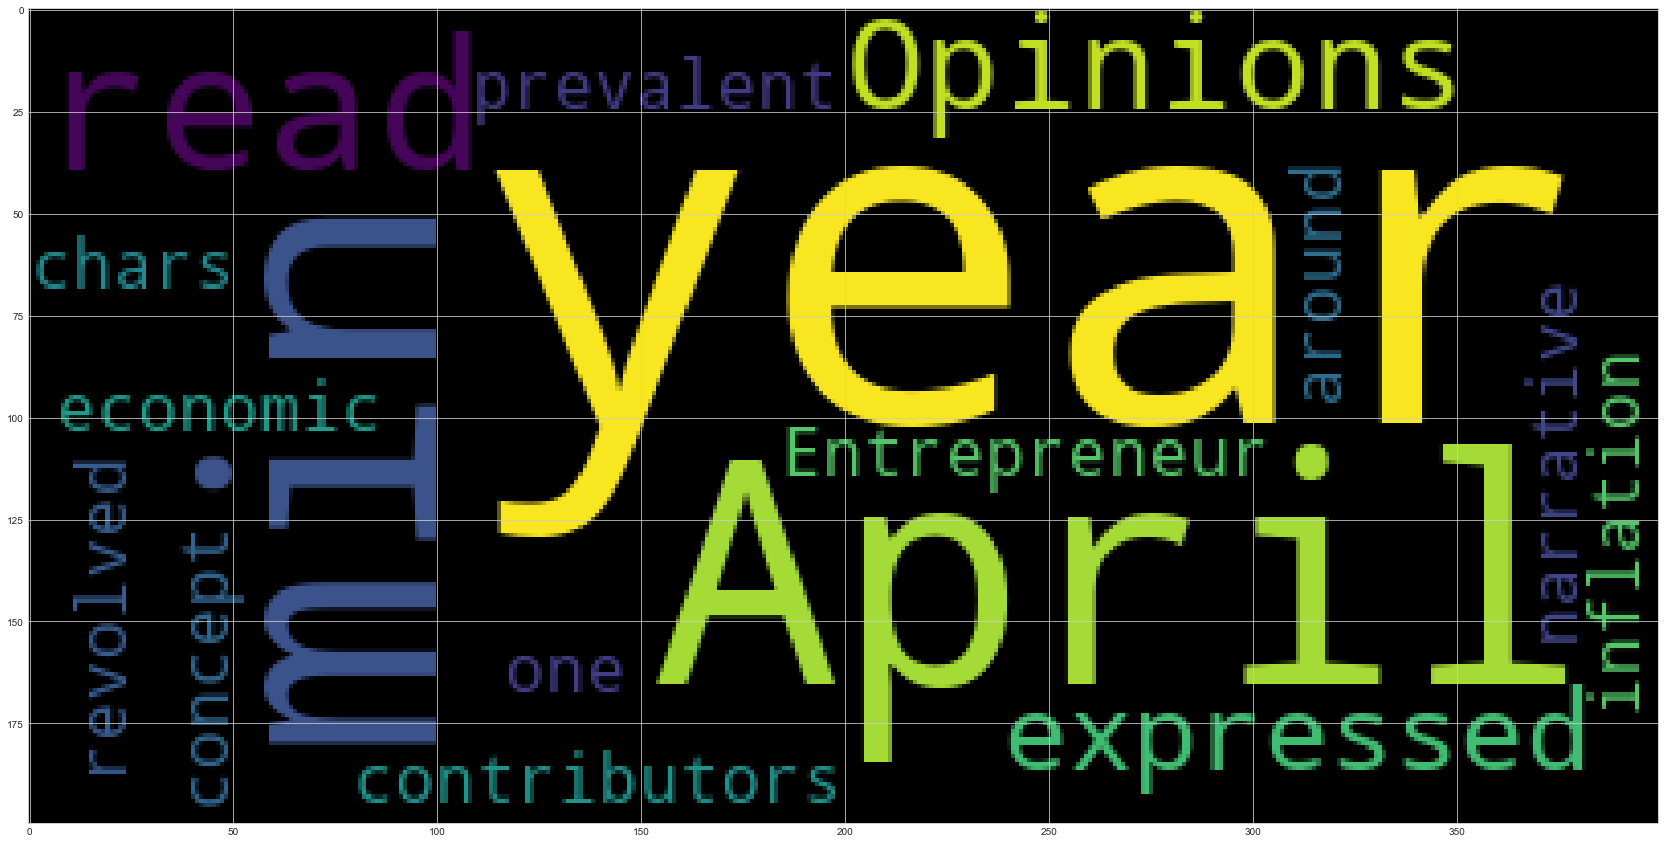

In [23]:
# Generate the Ethereum word cloud
Ethereum_article_content
wc = WordCloud().generate(Ethereum_article_content)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [24]:
# Concatenate all of the Bitcoin text together
import numpy as np
concatenated_bitcoin_contents = []
for num in np.arange(20):
    concatenated_bitcoin_contents.append(Bitcoin_Evrything['articles'][num]['content'])
    
concatenated_bitcoin_contents = listToStr = ' '.join(map(str, concatenated_bitcoin_contents))
concatenated_bitcoin_contents

# i Concatenate 20 contets from each article

'By Reuters Staff\r\nMay 12 (Reuters) - Tesla Inc has suspended the use of bitcoin to purchase vehicles, Chief Executive Officer Elon Musk said in a tweet, citing concerns about use of fossil fuel for b… [+56 chars] The cryptocurrency exchange platform Coinbase has caved. After a long silence to the hoards imploring the company to let them trade Dogecoin, theyve decided to list the meme, adding a sheen of legiti… [+2494 chars] Jack Dorsey, the co-founder and CEO of Twitter, tweeted Wednesday that bitcoin "incentivises renewable energy." And Elon Musk responded "True."The BBC adds that the tweets came "despite experts warni… [+1332 chars] Coinswitch Kuber, a startup that allows young users in India to invest in cryptocurrencies, said on Thursday it has raised $25 million in a new financing round as it looks to expand its reach in Indi… [+2387 chars] Tesla CEO Elon Musk says the company has suspended purchases of its vehicles using Bitcoin.\r\n“We are concerned about rapidly increasing u

In [ ]:
# Run the NER processor on all of the text
doc = nlp(concatenated_bitcoin_contents)
#doc.user_data["title"] = "Bitcoin"



In [ ]:
# Render the visualization
displacy.serve(doc, style="ent")

C:\Users\goshl\anaconda3\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['GPE', 'ORG' ]]
print(entities)

# I tried to print it, for them reason it is not showing up 

---

### Ethereum NER

In [6]:
# Concatenate all of the Ethereum text together
import numpy as np
concatenated_Ethereum_contents = []
for num0 in np.arange(20):
    concatenated_Ethereum_contents.append(Ethereum_Evrything['articles'][num0]['content'])
    
concatenated_Ethereum_contents = listToStr = ' '.join(map(str, concatenated_Ethereum_contents))
concatenated_Ethereum_contents   


"April\r\n27, 2021\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nThe prevalent economic narrative of this year has revolved around one concept: inflation. Year after year,… [+6638 chars] April\r\n23, 2021\r\n3 min read\r\nThis article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nAfter Bitcoin , another cryptocurrency that has capture… [+2643 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.\r\nBitcoin is down ro… [+1222 chars] Coinbase shares tumbled today to their their lowest point since the company began trading publicly on April 14. The market often moves in mysterious ways, but several drivers could be at play, includ… [+8477 chars] Bitcoin vs. Ethereum\r\nGetty Images AsiaPac\r\nBitcoin has long been the dominant cryptocurrency, but recently Ethereum'

In [11]:
# Run the NER processor on all of the text
doc0 = nlp(concatenated_Ethereum_contents)
doc0.user_data["title"] = "Ethereum"

In [ ]:
# Render the visualization
displacy.serve(doc0, style="ent")

C:\Users\goshl\anaconda3\lib\site-packages\spacy\displacy\__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
# List all Entities
entities = [ent.text for ent in doc0.ents if ent.label_ in ['GPE', 'ORG']]
print(entities)

# I tried to print it, for them reason it is not showing up 

---